# Project: Wrangling and Analyze Data

In [2]:
# importing pandas and requests packages
import pandas as pd
import numpy as np
import requests
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

# download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# reading the twitter_archive_enhanced dataset

twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv

In [4]:
# request the file from the udacity server

URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(URL) 


In [5]:
# creating and saving the file using the open function
file = open("image_prediction.tsv", "wb") 
file.write(response.content)
file.close()

In [6]:
# ensure that the file is always closed using thw 'with' statement
with open("image_prediction.tsv", "wb")as file:
    file.write(response.content)

In [7]:
# read the image_prediction.tsv file and show 2 rows
df_image = pd.read_csv('image_prediction.tsv', '\t')


C:\Users\User\AppData\Local\Temp\ipykernel_11040\3157526433.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_image = pd.read_csv('image_prediction.tsv', '\t')


In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

3. read the tweet_json.txt file downloaded

In [9]:
# read the tweet_json.txt file downloaded
list_tweets = []
with open('tweet-json.txt', 'r', encoding='utf-8') as openfile:
  for line in openfile:
    data = json.loads(line)
    list_tweets.append(data)

In [10]:
# extract id, retweet_count, favorite_count from the json file
df_list = []
for i in list_tweets:
    tweet_id = i['id']
    retweet_count = i['retweet_count']
    favorite_count = i['favorite_count']
    df_list.append({'id':tweet_id , 'retweet_count': retweet_count , 'favorite_count': favorite_count})
    
#source code: Alx_Udacity Slack

In [11]:
# Create a data Frame from Json extracted data: 
df_json = pd.DataFrame(df_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

# ASSESSING DATA

In [12]:
# to display and asses this dataframe
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [13]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Quality Issues
1. Drop tweets with no images in the twitter_achive_enhanced dataframe
1. Drop non dogs record
2. Some names in the name column in the twitter_achive_enhanced dataframe appear to be incorrect, "a", for example.
2. Drop retweet_id's in the twitter_achive_enhanced, we are only interested in the original tweets
4. There are unnecessary colums in the Twitter_Archive_enhanced dataframe not relevant for analysis such as 
   ('in_reply_to_status_id' , 'in_reply_to_user_id' , 'source' ,    'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' ,'expanded_urls'), drop them

5. The colums in the df_image dataframe are not descriptive enough and needs to be renamed.
6. The Timestamp column in the twitter_archive_enhanced dataframe should be datatime datatype not object.
7. The tweet_id datatype should be changed from integer to string
8. Id column in the df_json should be renamed to tweet_id as in the other two dataframe
9. The none values in doggo,floofer,pupper,puppo should be replaces with nan or a blank space
10. There are missing values in some of the twitter_archive_enhanced columns
11. Remove unnecessary columns such as jpg_url, 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' from                  df_image dataframe
9. Drop all the non dogs record in 'p1_dog' in the df_image_clean dataframe

# Tidyness Issues

1. The dog stages doggo,floofer,pupper,puppo should be in a one descriptive column 'Stage'.
2. The twitter_archive_enhanced should merge with df_image dataframe on tweet_id, and then with df_json on        tweet_id after cleaning.

# Cleaning

In [18]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

Define:

Quality issue 1: to check for tweets that has images

Code

In [19]:
# As rating of dogs in each tweet mainly depends on image.
# Check if the number of tweets in twitter_archive_enhanced == number of tweets that have images in df_image

twitter_archive_enhanced_clean['tweet_id'].size == df_image_clean['tweet_id'].size

False

In [20]:
# since it's false, filter twitter_archive to only have tweets having images in df_image dataframe
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'].isin(df_image_clean['tweet_id'].unique())]

# source code: https://www.kaggle.com/code/shaltout/explore-weratedogs-twitter-archive#Gathering-Data

Test

In [21]:
# Test that all tweets in twitter_archive have images in img_pred:

twitter_archive_enhanced_clean['tweet_id'].size == df_image_clean['tweet_id'].size

True

Define:

Quality isssue 2: remove all non dog records

Code

In [22]:
# check for non dogs record in the df_image_clean dataframe

df_image_clean['p1_dog'].unique()
non_dogs = df_image_clean[df_image_clean['p1_dog']== False].index

#source code: shorturl.at/abglq

In [23]:
# Drop all non dogs records from df_image dataframe as  only dogs rating is needed:
df_image_clean.drop(non_dogs, inplace = True)

Test

In [24]:
# test that all non dogs records are dropped
df_image_clean[df_image_clean['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Define:

Quality issue 3: name column appear to be incorrect, for example "a", for 

code:

In [25]:
twitter_archive_enhanced_clean['name'].value_counts()

None          578
a              55
Charlie        11
Penny          10
Oliver         10
             ... 
Lenox           1
Tilly           1
Harvey          1
Blanket         1
Christoper      1
Name: name, Length: 936, dtype: int64

In [26]:
#list names in lowercase 
no_names = twitter_archive_enhanced_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_enhanced_clean[no_names].name.value_counts().sort_index()


a               55
actually         1
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
light            1
my               1
not              1
officially       1
one              4
quite            3
space            1
such             1
the              7
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [27]:
# replace all remaining lowercase names with NaN
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan


In [28]:
# replace all 'None' names with NaN
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['name']=='None', 'name'] = np.nan

Test

In [29]:
twitter_archive_enhanced_clean['name'].value_counts()

Charlie       11
Cooper        10
Lucy          10
Tucker        10
Oliver        10
              ..
Lenox          1
Tilly          1
Harvey         1
Blanket        1
Christoper     1
Name: name, Length: 913, dtype: int64

In [30]:
# check for remaining lowercase names
twitter_archive_enhanced_clean['name'].str.extract('(^[^A-Z].*$)')[0].unique()

array([nan], dtype=object)

Define:

Quality issue 4: remove retweets and have only original tweets

Code

In [31]:
# Filter twitter_archive to only have original tweets and remove all retweets:

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].isnull()]

Test

In [32]:
# Test that all tweets in twitter_archive_enhanced_clean does not have retweet_id

twitter_archive_enhanced_clean['retweeted_status_id'].unique()

array([nan])

Define:

Quality Issue 5: Drop all columns not necessary for ananlysis

Code

In [33]:

# Drop all the colums not relevant for analysis 


drop_column = ['in_reply_to_status_id' , 'in_reply_to_user_id' , 'source' , 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp' ,'expanded_urls']

twitter_archive_enhanced_clean.drop(drop_column , inplace =True , axis=1)

#source code:shorturl.at/abglq

Test

In [34]:
# Test to see the remaining columns
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


Define

# Tidyness issue 1: put doggo, floofer, pupper, puppo  in one column 'Stage'

Code

In [35]:
# Repace "None" values in the ['doggo', 'floofer', 'pupper', 'puppo']  columns by balnk text '':

twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

In [36]:
# confirm that its replaced

twitter_archive_enhanced_clean['puppo'].unique()

array(['', 'puppo'], dtype=object)

In [37]:
twitter_archive_enhanced_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1688
1,,,,puppo,22
2,,,pupper,,203
3,,floofer,,,7
4,doggo,,,,63
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [38]:

# Merge the 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive_enhanced _clean should in one column 'Stage'
#one variable should be represented in one column to be tidy

twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['doggo'] +twitter_archive_enhanced_clean['floofer'] + twitter_archive_enhanced_clean['pupper'] + twitter_archive_enhanced_clean['puppo']

#source code:udacity classroom

In [39]:
# separate two dog stages by ","
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [40]:
# Replace blank text value in stage column by np.nan:

twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean['stage'].replace('', np.nan)

#source code:shorturl.at/abglq

In [41]:
# Drop 'doggo', 'puppo', 'pupper', 'floofer' columns 

drop_list = ['doggo', 'puppo', 'pupper', 'floofer']
twitter_archive_enhanced_clean.drop(drop_list , axis=1 , inplace= True)

Test

In [42]:
twitter_archive_enhanced_clean['stage'].value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [43]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN




Define:

Quality issue 6: to change the datatypes to an appropriate datatype



Code

In [44]:
twitter_archive_enhanced_clean['tweet_id']= twitter_archive_enhanced_clean['tweet_id'].astype(str)

In [45]:
twitter_archive_enhanced_clean['timestamp']= twitter_archive_enhanced_clean['timestamp'].astype('datetime64')

In [46]:
df_image_clean['tweet_id']= df_image_clean['tweet_id'].astype(str)

In [47]:
twitter_archive_enhanced_clean['stage']= twitter_archive_enhanced_clean['stage'].astype('category')

Test

In [48]:
#confirm the datetime change
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   text                1994 non-null   object        
 3   rating_numerator    1994 non-null   int64         
 4   rating_denominator  1994 non-null   int64         
 5   name                1350 non-null   object        
 6   stage               306 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 111.3+ KB


Define:

Quality issue 7: drop columns from df_image dataframe not needed for analysis

Code

In [49]:
# Remove columns not needed in the df_image dataframe jpg_url, 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

drop_cols = ['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
df_image_clean.drop(drop_cols , axis=1 , inplace =True)

#source code:shorturl.at/abglq

Test

In [50]:
# Test that the columns are dropped

df_image_clean.columns

Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')

Define:
Quality issue 8: Rename the df_image colums to be more descriptive

In [51]:
# Rename columns of df_image data frame to be more descriptive

new_col = {'p1': 'breed' , 'p1_conf': 'pred_confidence' , 'p1_dog': 'is_dog' }
df_image_clean.rename(columns= new_col , inplace =True)

In [52]:
# confirm the rename

df_image_clean.columns

Index(['tweet_id', 'breed', 'pred_confidence', 'is_dog'], dtype='object')

In [53]:
# change "id" column in json_df to "tweet_id" to be consistent with other two data frames

df_json_clean.rename(columns={'id': 'tweet_id'} , inplace = True)

Test

In [54]:
# confirm the rename

df_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [55]:

df_json_clean['tweet_id']= df_json_clean['tweet_id'].astype(str)

Define:

Tidynes issue 2: #Merge the three dataframes together

Code

In [56]:
# Merge twitter_archive_enhanced_clean with img_pred_clean dataframe
df = twitter_archive_enhanced_clean.merge(df_image_clean ,on='tweet_id' ,  how= 'inner')

# Merge previous df with json_df_clean to create master df that will be used in our analysis:
df_master = df.merge(df_json_clean , on= 'tweet_id' , how='inner')

#source code:shorturl.at/abglq

Test

In [57]:
df_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,breed,pred_confidence,is_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,0.716012,True,4328,25461
2,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,basset,0.555712,True,9774,41048
3,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13,10,NaN,NaN,Chesapeake_Bay_retriever,0.425595,True,3261,20562
4,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,Appenzeller,0.341703,True,2158,12041


# storing the dataframe in csv file

In [58]:
df_master.to_csv('twitter_archive_master.csv', index= False)

# Analysis and Visualization

In [59]:
# the start date of tweets
df_master['timestamp'].min()

Timestamp('2015-11-15 22:32:08')

In [60]:
# end date of  gathered tweets
df_master['timestamp'].max()

Timestamp('2017-08-01 00:17:27')

In [67]:
# the top 10 breeds
df_master['breed'].value_counts()[0:10]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
toy_poodle             38
Pomeranian             38
malamute               29
Name: breed, dtype: int64

#  The most liked breed

In [68]:
most_liked_breed = df_master.groupby('breed')['favorite_count'].mean()[0:10].sort_values(ascending = False)
most_liked_breed

#source code:shorturl.at/abglq

breed
Afghan_hound                      17326.666667
Border_terrier                    13578.000000
Bedlington_terrier                13025.000000
Australian_terrier                11127.500000
Blenheim_spaniel                   9280.900000
Border_collie                      8933.083333
American_Staffordshire_terrier     7559.538462
Appenzeller                        7317.500000
Bernese_mountain_dog               6790.700000
Airedale                           5280.833333
Name: favorite_count, dtype: float64

 # What is WeRateDogs's posting trend by month


In [69]:
# extract the month and groupby tweet_id
monthly_tweets_count = df_master.groupby(df_master['timestamp'].dt.to_period('M'))['tweet_id'].count()

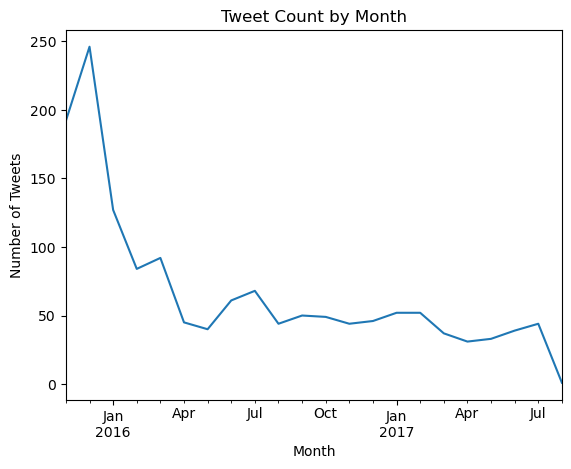

In [70]:
monthly_tweets_count.plot()
plt.title('Tweet Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.show()

#source code: github.com/evanchen13/weratedogs/blob/master/wrangle_act.ipynb

# What is the monthly trend of interactions with WeRateDogs's posts?

Here, "interactions" is the sum of retweets and favorites. Create a new column called tweet_activity with this sum, and then use a similar process as before to find the average tweet_activity per tweet by month.

In [71]:
df_master['tweet_activity'] = df_master['retweet_count']+df_master['favorite_count']

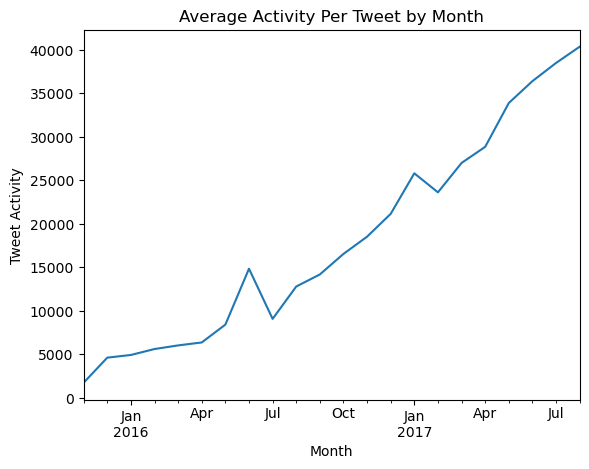

In [72]:
monthly_tweet_activity = df_master.groupby(df_master['timestamp'].dt.to_period('M'))['tweet_activity'].mean()

monthly_tweet_activity.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Tweet Activity');


In [80]:
# to get the rows with stages  only
df_stage =df_master[df_master['stage'].isnull()== False]


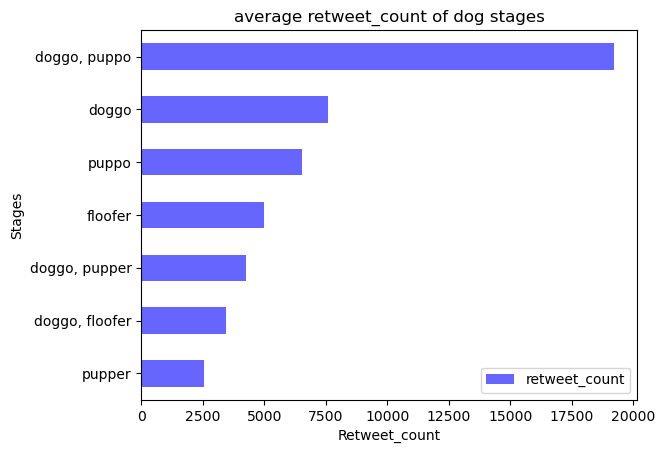

In [79]:

# visualize Average retweet counts by dog stages

retweet_counts_by_stages = pd.DataFrame(df_stage.groupby('stage').retweet_count.mean().sort_values())
retweet_counts_by_stages['stage']= retweet_counts_by_stages.index

retweet_counts_by_stages.plot(kind="barh", color="b", alpha=0.6, title="average retweet_count of dog stages")
plt.xlabel("Retweet_count")
plt.ylabel ("Stages")
plt.show()

#source code: stackoverflow.com

In [84]:
df_master['stage'].value_counts()

pupper            144
doggo              48
puppo              19
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64